<a href="https://colab.research.google.com/github/asegura4488/MetodosComputacionales1/blob/main/Semana11/MediaMovil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [7]:
os.chdir("/content/drive/MyDrive/ColabNotebooks/Cursos/MetodosComputacionalesI/")
!ls

Parcial2    Semana1   Semana11	Semana3  Semana5  Semana7  Semana9
ProyectoML  Semana10  Semana2	Semana4  Semana6  Semana8


In [8]:
file = '/content/drive/MyDrive/ColabNotebooks/Cursos/MetodosComputacionalesI/Semana11/Data/MediaMovilData.csv'
file

'/content/drive/MyDrive/ColabNotebooks/Cursos/MetodosComputacionalesI/Semana11/Data/MediaMovilData.csv'

In [19]:
data = pd.read_csv(file)
data.head(10)
x = np.array(data['Ventas'])

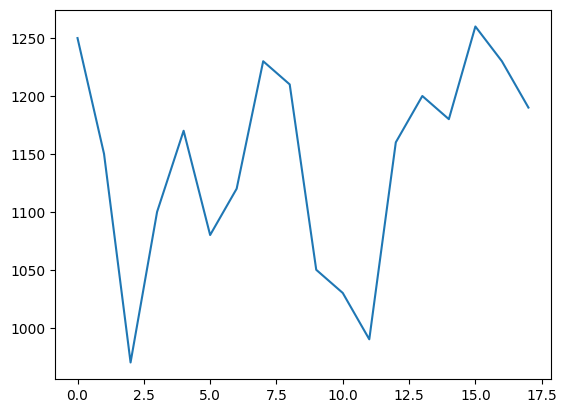

In [20]:
plt.plot(x)

In [39]:
def GetMediaMovil(x,n):

  media = np.zeros(len(x)+1)

  for i in range(len(media)):

    sum_ = 0.

   # print(i)
    if i >= n:

     ## print(i)
      for j in range(i-n,i):

        sum_ += x[j]

      media[i] = sum_/n

    else:

      media[i] = x[i]

  return media

In [43]:
media = GetMediaMovil(x,3)
#media

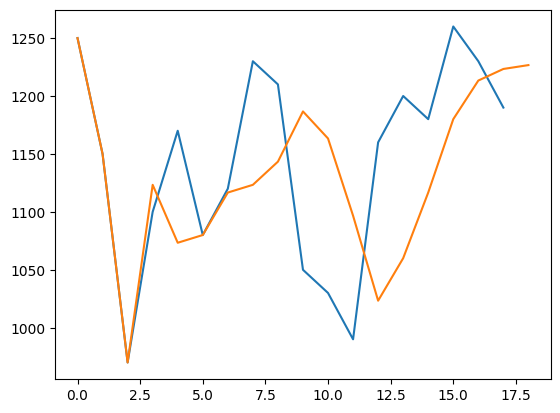

In [44]:
plt.plot(x)
plt.plot(media)

In [45]:
media[-1]

np.float64(1226.6666666666667)